https://github.com/selfedu-rus/neural-network/blob/master/lesson%2025.%20GRU%20sentiment%20analysis.py

https://www.youtube.com/playlist?list=PLA0M1Bcd0w8yv0XGiF1wjerjSZVSrYbjh

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import re
from tensorflow.keras.layers import Input, Dense, SimpleRNN, LSTM, Embedding, Bidirectional, GRU, Dropout, ConvLSTM2D, ConvLSTM1D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, recall_score, precision_score
import tensorflow as tf
import codecs
from google.colab import files

## 1 Загрузка тектового файла

In [ ]:
uploaded = files.upload()

Saving war_and_peace.txt to war_and_peace.txt


## 2 Открытие тектового файла

In [ ]:
with open('Mednyy_vsadnik.txt', 'r', encoding='utf-8') as f:
    text = f.read()
    text = re.sub(r'^$', ' ', text) # Удаление пустых строк
    text = re.sub(r'\n\n', ' ', text) # Удаление переноса строк
    text = re.sub(r'\n', '', text) # Удаление переноса строк

## 3 Предварительна подготовка данных

In [ ]:
words_count = 1000 # количество частовстречающихся слов для обучения
tokenizer = Tokenizer(num_words=words_count)
tokenizer.fit_on_texts([text])

In [ ]:
dist = list(tokenizer.word_counts.items())
print(dist[:15]) # Количество встречающихся слов

[('александр', 1), ('сергеевич', 1), ('пушкин', 5), ('медный', 3), ('всадник', 3), ('петербургская', 1), ('повесть', 1), ('предисловие', 1), ('происшествие', 1), ('описанное', 1), ('в', 96), ('сей', 1), ('повести', 1), ('основано', 1), ('на', 43)]


In [ ]:
# Преобразование слов в последовательность чисел
data = tokenizer.texts_to_sequences([text])
res = np.array(data[0]) # Для Embedding

In [ ]:
res[:10]

array([412, 413,  54, 109, 110, 414, 415, 416, 417, 418])

In [ ]:
inp_words = 3 # Количество слов на основе которых будет выполняться предсказание
n = res.shape[0] - inp_words

In [ ]:
X = np.array([res[i:i + inp_words] for i in range(n)]) # Формирование обучающей выборки
Y = to_categorical(res[inp_words:], num_classes=words_count) # Предсказываемые значения

## 4 Сборка модели

In [ ]:
callback = EarlyStopping(monitor='accuracy', patience=10)

In [ ]:
model1 = Sequential([
    Embedding(words_count, 256, input_length=inp_words),
    Bidirectional(LSTM(128, dropout=0.2, return_sequences=True)),
    LSTM(64, dropout=0.4, return_sequences=True),
    SimpleRNN(128, activation='tanh'),
    Dense(words_count/2, activation='relu'),
    Dense(words_count, activation='softmax')
])

In [ ]:
model1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 3, 256)            256000    
                                                                 
 bidirectional_4 (Bidirecti  (None, 3, 256)            394240    
 onal)                                                           
                                                                 
 lstm_9 (LSTM)               (None, 3, 64)             82176     
                                                                 
 simple_rnn_31 (SimpleRNN)   (None, 128)               24704     
                                                                 
 dense_23 (Dense)            (None, 500)               64500     
                                                                 
 dense_24 (Dense)            (None, 1000)              501000    
                                                      

In [ ]:
model2 = Sequential([
    Embedding(words_count, 256, input_length=inp_words),
    SimpleRNN(128, activation='relu', dropout=0.2, return_sequences=True),
    SimpleRNN(128, activation='relu', dropout=0.3, return_sequences=True),
    SimpleRNN(64, activation='relu'),
    Dense(words_count/2, activation='relu'),
    Dense(words_count, activation='softmax')
])

In [ ]:
model2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 3, 256)            256000    
                                                                 
 simple_rnn_32 (SimpleRNN)   (None, 3, 128)            49280     
                                                                 
 simple_rnn_33 (SimpleRNN)   (None, 3, 128)            32896     
                                                                 
 simple_rnn_34 (SimpleRNN)   (None, 64)                12352     
                                                                 
 dense_25 (Dense)            (None, 500)               32500     
                                                                 
 dense_26 (Dense)            (None, 1000)              501000    
                                                                 
Total params: 884028 (3.37 MB)
Trainable params: 8840

## 5 Компиляция и обучение моделей


Для подборки было выбрано 2 модели
Первая представленная на уроке 5 и дополненна одним простым рекурентным слоем
Вторая Состаящая аолность из трех последовательных рекурентных слоев

In [ ]:
model1.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
history1 = model1.fit(X, Y, batch_size=50, epochs=50,  validation_split=0.2, callbacks=[callback], verbose=1)

Epoch 1/50
40/40 [==============================] - 2s 51ms/step - loss: 1.2550 - accuracy: 0.6160 - val_loss: 26.3528 - val_accuracy: 0.0691
Epoch 2/50
40/40 [==============================] - 2s 49ms/step - loss: 1.9597 - accuracy: 0.4491 - val_loss: 24.2676 - val_accuracy: 0.0711
Epoch 3/50
40/40 [==============================] - 2s 51ms/step - loss: 1.7667 - accuracy: 0.4807 - val_loss: 23.2008 - val_accuracy: 0.0732
Epoch 4/50
40/40 [==============================] - 3s 63ms/step - loss: 1.3606 - accuracy: 0.5824 - val_loss: 22.9180 - val_accuracy: 0.0813
Epoch 5/50
40/40 [==============================] - 2s 58ms/step - loss: 1.0912 - accuracy: 0.6572 - val_loss: 23.8533 - val_accuracy: 0.0833
Epoch 6/50
40/40 [==============================] - 2s 51ms/step - loss: 0.8915 - accuracy: 0.7213 - val_loss: 24.3515 - val_accuracy: 0.0874
Epoch 7/50
40/40 [==============================] - 2s 51ms/step - loss: 0.8484 - accuracy: 0.7340 - val_loss: 24.8171 - val_accuracy: 0.0854
Epoch 

In [ ]:
model2.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
history2 = model2.fit(X, Y, batch_size=50, epochs=50, validation_split=0.2, callbacks=[callback], verbose=1)

Epoch 1/50
40/40 [==============================] - 6s 57ms/step - loss: 6.7351 - accuracy: 0.0539 - val_loss: 6.4069 - val_accuracy: 0.0732
Epoch 2/50
40/40 [==============================] - 1s 27ms/step - loss: 6.2487 - accuracy: 0.0651 - val_loss: 6.4618 - val_accuracy: 0.0732
Epoch 3/50
40/40 [==============================] - 1s 26ms/step - loss: 6.0737 - accuracy: 0.0651 - val_loss: 6.6062 - val_accuracy: 0.0732
Epoch 4/50
40/40 [==============================] - 1s 27ms/step - loss: 5.9096 - accuracy: 0.0651 - val_loss: 6.8689 - val_accuracy: 0.0732
Epoch 5/50
40/40 [==============================] - 1s 27ms/step - loss: 5.7454 - accuracy: 0.0651 - val_loss: 7.0152 - val_accuracy: 0.0752
Epoch 6/50
40/40 [==============================] - 1s 27ms/step - loss: 5.6252 - accuracy: 0.0636 - val_loss: 7.0757 - val_accuracy: 0.0732
Epoch 7/50
40/40 [==============================] - 1s 28ms/step - loss: 5.4577 - accuracy: 0.0631 - val_loss: 7.3838 - val_accuracy: 0.0671
Epoch 8/50
40

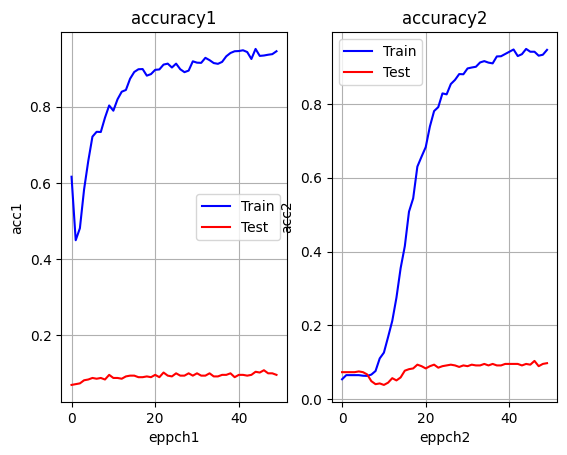

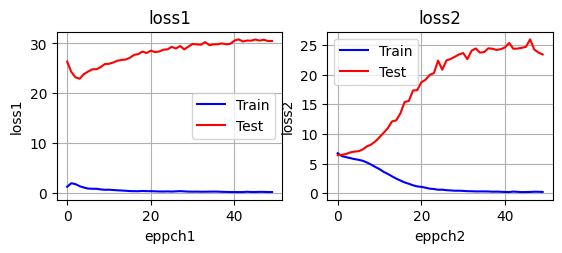

In [ ]:
acc1 = history1.history['accuracy']
acc_v1 = history1.history['val_accuracy']
loss1 = history1.history['loss']
loss_v1 = history1.history['val_loss']

acc2 = history2.history['accuracy']
acc_v2 = history2.history['val_accuracy']
loss2 = history2.history['loss']
loss_v2 = history2.history['val_loss']

epochs1 = range(len(acc1))
epochs2 = range(len(acc2))

plt.figure()
plt.subplot(1,2,1)
plt.plot(epochs1, acc1, 'b', label = 'Train')
plt.plot(epochs1, acc_v1, 'r', label = 'Test')
plt.legend()
plt.title('accuracy1')
plt.xlabel('eppch1')
plt.ylabel('acc1')
plt.grid()
plt.subplot(1,2,2)
plt.plot(epochs2, acc2, 'b', label = 'Train')
plt.plot(epochs2, acc_v2, 'r', label = 'Test')
plt.legend()
plt.title('accuracy2')
plt.xlabel('eppch2')
plt.ylabel('acc2')
plt.grid()

plt.figure()
plt.subplot(2,2,1)
plt.plot(epochs1, loss1, 'b', label = 'Train')
plt.plot(epochs1, loss_v1, 'r', label = 'Test')
plt.legend()
plt.title('loss1')
plt.xlabel('eppch1')
plt.ylabel('loss1')
plt.grid()
plt.subplot(2,2,2)
plt.plot(epochs2, loss2, 'b', label = 'Train')
plt.plot(epochs2, loss_v2, 'r', label = 'Test')
plt.title('loss2')
plt.xlabel('eppch2')
plt.ylabel('loss2')
plt.legend()
plt.grid()
plt.show()

In [ ]:
def buildPhrase(Model, texts, str_len=20):
    res = texts
    data = tokenizer.texts_to_sequences([texts])[0]
    for i in range(str_len):
        x = data[i:i + inp_words] # Для Embedding
        inp = np.expand_dims(x, axis=0) # Для Embedding

        pred = Model.predict(inp)
        indx = pred.argmax(axis=1)[0]
        data.append(indx)

        res += " " + tokenizer.index_word[indx]  # дописываем строку

    return res

Выполним реализацию предсказаний по каждой из моделей и выведем 25 последующих слов

In [ ]:
res1 = buildPhrase(model1, "По ней стремился", 25)
print(res1)

1/1 [==============================] - 0s 28ms/step
По ней стремился одиноко по мшистым топким берегам чернели избы здесь и там приют убогого чухонца и лес неведомый лучам в тумане спрятанного солнца кругом шумел и думал


In [ ]:
res2 = buildPhrase(model2, "По ней стремился", 25)
print(res2)

1/1 [==============================] - 0s 23ms/step
По ней стремился одиноко по мшистым топким берегам чернели избы здесь и там приют убогого чухонца и лес неведомый лучам в тумане спрятанного солнца кругом шумел и думал


По результатам тестирования двух моделей наблюдаются очень хорошие показатели точности. Единственное отличие М1 от М2 - это скорость обучения, для М2 на каждой эпохе средняя скорость обучения 1.26 сек, что меньше чем у М1 средняя скорость обучения на каждой эпохе 2.7 сек. В рамках данной задачи не очень критично, но скажется на задачах с большим объемом информации

In [2]:
from keras.datasets import imdb
from keras.utils import pad_sequences

In [4]:
max_features = 10000 # Количество признаков
maxlen = 100

In [5]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

17464789/17464789 [==============================] - 0s 0us/step


In [6]:
# Pad последовательности (примеров в x единицу времени)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [7]:
imdb_model_1 = Sequential([
    Embedding(max_features, 256),
    LSTM(128, dropout=0.4, recurrent_dropout=0.4),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [8]:
imdb_model_2 = Sequential([
    Embedding(max_features, 128),
    LSTM(128, dropout=0.4, recurrent_dropout=0.4),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(32, activation='LeakyReLU'),
    Dropout(0.4),
    Dense(16, activation='elu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [9]:
imdb_model_3 = Sequential([
    Embedding(max_features, 128),
    LSTM(128, dropout=0.4, recurrent_dropout=0.4),
    Dense(32, activation='relu'),
    Dropout(0.4),
    Dense(32, activation='LeakyReLU'),
    Dropout(0.4),
    Dense(16, activation='elu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [ ]:
opt_adam = tf.keras.optimizers.legacy.Adam(learning_rate=0.01)
opt_rmsp = tf.keras.optimizers.legacy.RMSprop()

loss_bce = tf.keras.losses.BinaryCrossentropy()

In [ ]:
batch_list = [250]
epoch_list = [15]

In [ ]:
MyModel = {}

In [ ]:
MyModel['models'] = [imdb_model_1, imdb_model_2, imdb_model_3]
MyModel['optimizers'] = [opt_adam, opt_rmsp]
MyModel['losses'] = [loss_bce]

In [ ]:
def Reshape_2D_to_3D(x1, x2):
    """Функция преобразует 2D массив в 3D в случае необходимости"""
    if len(x1.shape[1:]) > 2:
        return x1, x2
    else:
        x1 = np.expand_dims(x1, axis=3)
        x2 = np.expand_dims(x2, axis=3)
        return x1, x2

def recall_precision(y_true, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]):
    recall_precision_dict = {}
    precision = precision_score(y_true, y_pred, labels=labels, average=None)
    recall = recall_score(y_true, y_pred, labels=labels, average=None)
    for i, el in enumerate(zip(precision, recall)):
        recall_precision_dict[f'Класс - {i}'] = [round(el[0],3), round(el[1],3)]
    return recall_precision_dict

def compile_models_improved(Model, X_train, X_test, y_train, y_test, model_batch=[250], model_epoch=[10], model_patience=10, model_metrics='accuracy'):
    """Функция осуществляет подбор наилудчшей модели с несколькими оптимизаторами"""
    print("Start")
    start = time.time()
    result_dict = {}
    callback_1 = EarlyStopping(monitor=model_metrics, patience=model_patience)
    # X_train, X_test = Reshape_2D_to_3D(X_train, X_test)
    for n1, model in enumerate(Model['models']): # Для каждой модели
        n1 += 1
        for n2, model_optimazer in enumerate(Model['optimizers']): # Для каждого оптимизатора
            n2 += 1
            for n3, loss_i in enumerate(Model['losses']): # Для каждой функции потерь
                n3 += 1
                for epoch in model_epoch:
                    for batch in model_batch:
                        # Компиляция модели
                        print(f'Компиляция модели: Model {n1}  Optimizer {n2}  Loss {n3}  Batch={batch}  Epochs={epoch}  Metrics={model_metrics}')
                        model.compile(optimizer=model_optimazer, loss=loss_i, metrics=[model_metrics])
                        # Обучение модели
                        print(f'Обучение модели: Model {n1}  Optimizer {n2} Loss {n3}  Batch={batch}  Epochs={epoch}  Metrics={model_metrics}')
                        model.fit(X_train, y_train, batch_size=batch, epochs=epoch, validation_data=(X_test, y_test), callbacks=[callback_1])
                        # Оценка модели
                        print(f'Оценка модели: Model {n1}  Optimizer {n2}  Loss {n3}  Batch={batch}  Epochs={epoch}  Metrics={model_metrics}')
                        test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=0)
                        # Запись результатов оценки модели в словарь
                        # Лучшая модель будет определяться по наибольшемы результату метрики accuracy
                        print(f'Запись результатов: Model {n1}  Optimizer {n2}  Loss {n3}  Batch={batch}  Epochs={epoch}  Metrics={model_metrics}')
                        print("*"*90,'\n')
                        result_dict[f'Model_{n1}__Optimizer_{n2}__Loss_{n3}__Batch={batch}__Epochs={epoch}'] = test_acc

    model_keys_list = list(result_dict.keys())
    model_values_list = list(result_dict.values())

    best_accuracy = max(model_values_list)
    count_best_accuracy = model_values_list.count(best_accuracy)

    best_model_dict = {}

    print('Определение наилудчшей модели')
    for acc in range(count_best_accuracy):
        model_keys_list = list(result_dict.keys())
        model_values_list = list(result_dict.values())
        if best_accuracy in model_values_list:
            acc_index = model_values_list.index(best_accuracy)
            best_model_dict[model_keys_list[acc_index]] = best_accuracy
            result_dict.pop(model_keys_list[acc_index])
        else:
            break
    stop = time.time()
    print("Time", stop - start)
    return best_model_dict, result_dict

In [ ]:
best_model, result_dict_models = compile_models_improved(MyModel, x_train, x_test, y_train, y_test, batch_list, epoch_list, 10)

Start
Компиляция модели: Model 1  Optimizer 1  Loss 1  Batch=250  Epochs=15  Metrics=accuracy
Обучение модели: Model 1  Optimizer 1 Loss 1  Batch=250  Epochs=15  Metrics=accuracy
Epoch 1/15
100/100 [==============================] - 181s 2s/step - loss: 0.5360 - accuracy: 0.7227 - val_loss: 0.4320 - val_accuracy: 0.8142
Epoch 2/15
100/100 [==============================] - 177s 2s/step - loss: 0.3418 - accuracy: 0.8558 - val_loss: 0.3895 - val_accuracy: 0.8407
Epoch 3/15
100/100 [==============================] - 176s 2s/step - loss: 0.2355 - accuracy: 0.9056 - val_loss: 0.4211 - val_accuracy: 0.8441
Epoch 4/15
100/100 [==============================] - 178s 2s/step - loss: 0.1579 - accuracy: 0.9386 - val_loss: 0.4735 - val_accuracy: 0.8280
Epoch 5/15
100/100 [==============================] - 178s 2s/step - loss: 0.1174 - accuracy: 0.9571 - val_loss: 0.5915 - val_accuracy: 0.8276
Epoch 6/15
100/100 [==============================] - 177s 2s/step - loss: 0.0836 - accuracy: 0.9699 - val

In [ ]:
best_model

{'Model_1__Optimizer_2__Loss_1__Batch=250__Epochs=15': 0.8281599879264832}

По результатам подбора моделей М1, М2, М3, batch_size = 250, epoch = 15 с оптимизаторами Adam и RMSprompt для датасета imdb наилудчшей была определена модель М1

    imdb_model_1 = Sequential([
        Embedding(max_features, 256),
        LSTM(128, dropout=0.4, recurrent_dropout=0.4),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

с одним слоем long short-tern memory и двумя полносвязными слоями
Модель показала точность равной 0.83 на валидационной выборке.

Общее время тестирования трех моделей заняло 13584 сек. = 3.77 часа